In [1]:
import time
import matplotlib.pyplot as plt

# Environments
from environments.ACOEnvironment import ACOEnvironment
from environments.Environment import Environment

# Algorithms
from algorithms.AntColonyOptimization import AntColonyOptimization
from algorithms.ParticleSwarmOptimization import ParticleSwarmOptimization

# Helper classes
from helpers.PathSpecification import PathSpecification
from helpers.Coordinate import Coordinate

# Creating an environment

We create the environment that will be used by all the nature-inspired algorithms.

We start by declaring the parameters:

In [2]:
# Please keep your parameters for the environment easily changeable here

# Environment parameters
width = 40
height = 40
start_pos = Coordinate(2, 2)
end_pos = Coordinate(38, 38)
obstacles = [(2.5, 0.15), (1.5, 0.02)] # We generate an obstacle of radius 2 with frequency 11% and obstacles of radius 1 with frequency 1.8%

# Algorithm parameters
step_size = 1
trail = 1.0
convergence_iter = 3500

Next, we create the environment and visualize it.

Finished preparing the environment


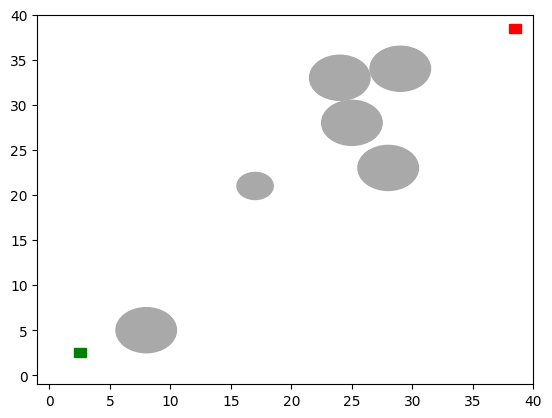

In [4]:
# Use the environment variables already declared above and add the definitions for pso
# eventually consider using the same environment for aco as for pso?
environment = Environment.create_environment(width, height, obstacles, start_pos=start_pos, end_pos=end_pos)
spec = PathSpecification(start_pos, end_pos)

# Show the environment in matplotlib
environment.visualize_environment()

# Ant Colony Optimization

First, we initialize the variables we will be using for ACO.

In [8]:
# Please keep your parameters for the ACO easily changeable here
aco_agents_per_generation = 30
aco_no_generations = 50
aco_q = 500
aco_evaporation = 0.5
aco_no_change_iter = 30
aco_sigma_elite = 50

Next, we build the environment and other necessary objects. We also print how the environment looks like

In [9]:
# Construct the optimization objects
# environment = ACOEnvironment.create_environment(width, height, obstacles, start_pos=start_pos, end_pos=end_pos)
aco_environment = ACOEnvironment.create_from_environment(environment)
aco = AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, convergence_iter, aco_no_change_iter, trail, aco_sigma_elite, step_size, num_processes=6)

Next, we run the ACO algorithm and print the results.

Started ACO
Generation 0
Routes found so far: 30
Best route's length: 316


Generation 1
Routes found so far: 30
Best route's length: 316


Generation 2
Routes found so far: 30
Best route's length: 311


Generation 3
Routes found so far: 30
Best route's length: 311


Generation 4
Routes found so far: 30
Best route's length: 212


Generation 5
Routes found so far: 30
Best route's length: 212


Generation 6
Routes found so far: 30
Best route's length: 212


Generation 7
Routes found so far: 30
Best route's length: 212


Generation 8
Routes found so far: 30
Best route's length: 212


Generation 9
Routes found so far: 30
Best route's length: 212


Generation 10
Routes found so far: 30
Best route's length: 147


Generation 11
Routes found so far: 30
Best route's length: 147


Generation 12
Routes found so far: 30
Best route's length: 147


Generation 13
Routes found so far: 30
Best route's length: 147


Generation 14
Routes found so far: 30
Best route's length: 147


Generation 15
Routes fo

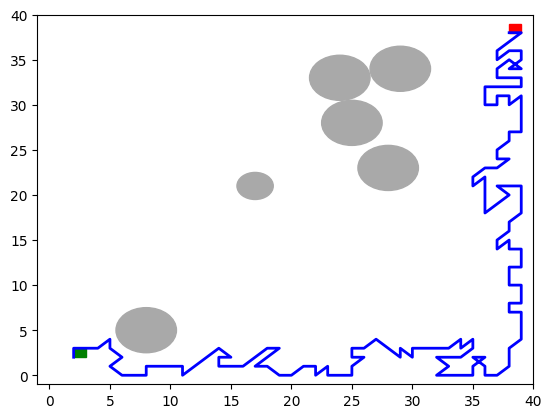

In [10]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started ACO")

# Run optimization
shortest_route, checkpoints = aco.find_shortest_route(spec, print_progress=True)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

# Print route path
aco_environment.visualize_environment(shortest_route)

#### Speed of convergence

Finished preparing the board
Generation 0
Routes found so far: 20
Best route's length: 322


Generation 1
Routes found so far: 20
Best route's length: 316


Generation 2
Routes found so far: 20
Best route's length: 238


Generation 3
Routes found so far: 20
Best route's length: 238


Generation 4
Routes found so far: 20
Best route's length: 212


Generation 5
Routes found so far: 20
Best route's length: 212


Generation 6
Routes found so far: 20
Best route's length: 212


Generation 7
Routes found so far: 20
Best route's length: 120


Generation 8
Routes found so far: 20
Best route's length: 120


Generation 9
Routes found so far: 20
Best route's length: 120


Generation 10
Routes found so far: 20
Best route's length: 120


Generation 11
Routes found so far: 20
Best route's length: 120


Generation 12
Routes found so far: 20
Best route's length: 120


Generation 13
Routes found so far: 20
Best route's length: 120


Generation 14
Routes found so far: 20
Best route's length: 120


Genera

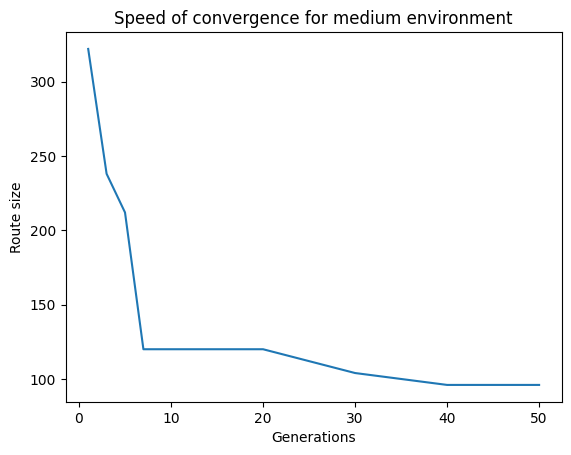

In [8]:
aco_agents_per_generation = 20
aco_no_generations = 50
aco_q = 200
aco_evaporation = 0.2
new_convergence_iter = 10000
aco_no_change_iter = 50
aco_sigma_elite = 50

# Create environment
aco_environment.reset()

# Start ACO Algorithm
aco = AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, new_convergence_iter, aco_no_change_iter, trail, aco_sigma_elite, num_processes=6)
shortest_route, checkpoints = aco.find_shortest_route(spec)

plt.plot([1, 3, 5, 7, 10, 20, 30, 40, 50], checkpoints)
plt.xlabel("Generations")
plt.ylabel("Route size")
plt.title("Speed of convergence for medium environment")
plt.show()

# Particle Swarm Optimization

We declare the necessary parameters for the Particle Swarm Optimization algorithm.

In [11]:
# Parameters specifically for PSO
pso_num_iterations = 500 # to let Lévy flights get out of local optima eventually
pso_inertia_weight = 1.0 # currently irrelevant as adapted from acceleration coefficients, but given for completeness
pso_num_particles = 100 # the number of particles generated initially to run pso on

Next, we run the Particle Swarm Optimization algorithm and print the results.

Started PSO
2.6540192604404047, 2.786598920943141
3.472783871245586, 3.326196839067654
5.119223362574807, 4.936486123124043
5.753810352013705, 6.159989827781841
7.147865024435732, 7.468108004803062
8.595084932974224, 9.085211723859953
10.110145830316608, 10.628888079248936
11.662259948617152, 12.171389347461288
13.333928027507536, 13.727959939612353
14.997164900208668, 15.259089315179667
16.57622066929564, 16.871662140195564
18.276516349122943, 18.116198980112777
19.6326555953016, 19.78086315177782
21.302411016029545, 21.303036972104625
22.768988932894896, 22.892951493298895
24.3826325634294, 24.479759477989848
25.938312242915053, 25.65530102988204
27.38840190303784, 26.90537112743863
28.831928436691776, 28.50771646919064
30.001477725949204, 29.805941206942695
31.199931903998287, 31.2014808273835
32.64635548418728, 32.621649366437616
33.95870546469411, 34.11771542553458
35.199739806948585, 35.36014966371455
36.561083446795344, 36.79112742974009
37.66878836178557, 37.95549258947789
Time

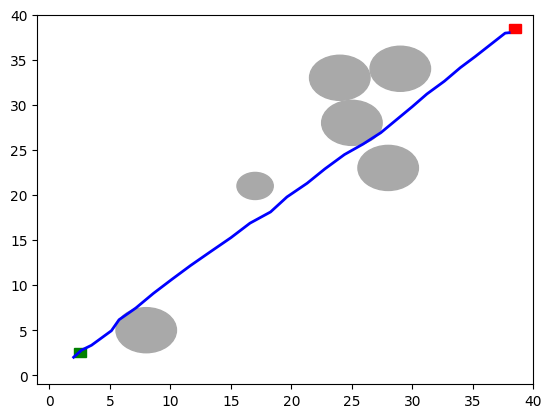

In [12]:
# initialize pso
pso = ParticleSwarmOptimization(environment, spec, pso_num_particles, convergence_iter, trail, step_size, pso_inertia_weight, pso_num_iterations)

# Save starting time
start_time = int(round(time.time() * 1000))

print("Started PSO")

# run the pso
shortest_route = pso.run()

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size; not really relevant for pso as it adds global bests and may get stuck for a bit
# normally measured in path length or time taken better
print("Route size: " + str(shortest_route.size()))

# Print route path
environment.visualize_environment(shortest_route)